## 训练数据集分割

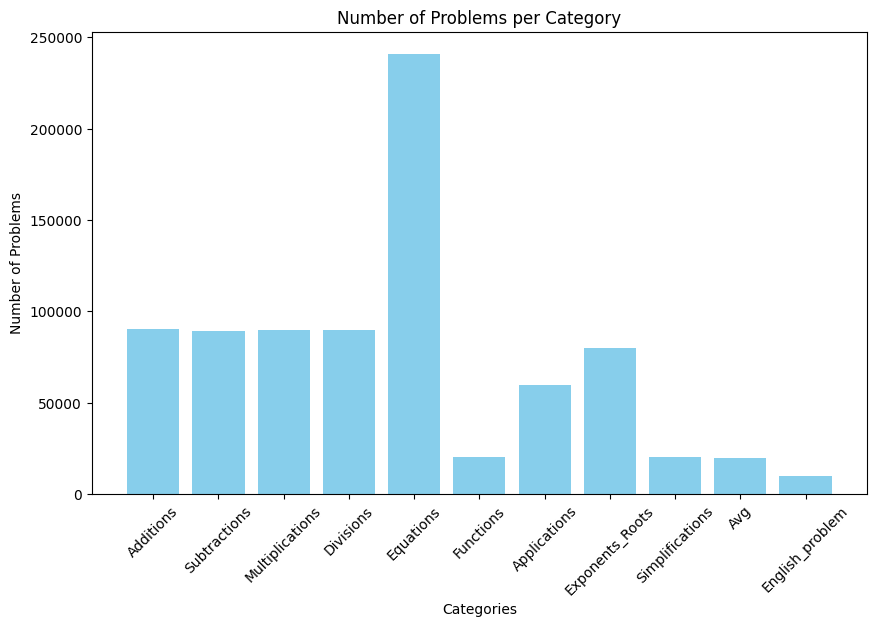

In [2]:
import json
import pandas as pd
import re
# Assuming the data is stored in a file named 'data.jsonl'
file_path = 'train.json'

# Read the data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

def contains_chinese(text):
    # 使用正则表达式匹配中文字符
    return re.search('[\u4e00-\u9fff]', text) is not None

PROMPT_DICT = {
    "prompt_add": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_sub": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_mul": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_div": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_evl": (
        "This is a linear equation calculation problem. Calculate the unknow value of the x , and the response format should be: The solution of the equation is: x vluae \n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_self": (
        "This is a calculation problem. Based on the expression, give the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_fun": (
        "This is a function calculation problem. Calculate the expression result ans, and the response format should be: The value of the function is: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_app": (
        "This is a mathematical application problem. Calculate the result ans, and the response format should be: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_avg": (
        "This is an average calculation problem. Calculate the result ans, and the response format should be: The average is ans.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_simple": (
        "This is a fraction simplification problem. Calculate the simplified result ans, and the response format should be: The simplified form is: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_english_problem":(
        "Solve	the	problem	step by	step (do not over-divide the steps) , put the final answer as follows .\n\n"
        "### Instruction:\n ### Input:\n{input}\n\n### Response:"
    )
}


additions = []
subtractions = []
multiplications = []
divisions = []
equations = []
functions = []
applications = []
exponents_roots = []
simplifications = []
avg_value = []
english_problem = []
for item in data:
    problem = item['problem']
    if contains_chinese(problem) is False:
        english_problem.append({
            "problem": PROMPT_DICT["prompt_english_problem"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif "解方程" in problem:
        equations.append({
            "problem": PROMPT_DICT["prompt_evl"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif "函数" in problem:
        functions.append({
            "problem": PROMPT_DICT["prompt_fun"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif "次方" in problem or "方根" in problem:
        exponents_roots.append({
            "problem": PROMPT_DICT["prompt_simple"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif "简化" in problem:
        simplifications.append({
            "problem": PROMPT_DICT["prompt_simple"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif "平均值" in problem:
        avg_value.append({
            "problem": PROMPT_DICT["prompt_avg"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif " + " in problem:
        additions.append({
            "problem": PROMPT_DICT["prompt_add"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif " - " in problem:
        subtractions.append({
            "problem": PROMPT_DICT["prompt_sub"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif " * " in problem:
        multiplications.append({
            "problem": PROMPT_DICT["prompt_mul"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    elif " / " in problem:
        divisions.append({
            "problem": PROMPT_DICT["prompt_div"].format(problem=problem, input=""),
            "solution": item["solution"]
        })
    else:
        applications.append({
            "problem": PROMPT_DICT["prompt_app"].format(problem=problem, input=""),
            "solution": item["solution"]
        })


import matplotlib.pyplot as plt

# Creating a dictionary with the count of each category
category_counts = {
    "Additions": len(additions),
    "Subtractions": len(subtractions),
    "Multiplications": len(multiplications),
    "Divisions": len(divisions),
    "Equations": len(equations),
    "Functions": len(functions),
    "Applications": len(applications),
    "Exponents_Roots": len(exponents_roots),
    "Simplifications": len(simplifications),
    "Avg":len(avg_value),
    "English_problem":len(english_problem)
}


# Creating a bar chart
categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Problems')
plt.title('Number of Problems per Category')
plt.xticks(rotation=45)
plt.show()


### 针对各类型的计算，要求输出的prompt都应该是不同的，这里我针对case制作不同的prompt

**加法**: 加法的格式也是有过程的，所以他的prompt应该是：这是一个数据计算问题，根据表达式，列出计算过程与最终的计算结果。

**减法**: 加法的格式也是有过程的，所以他的prompt应该是：这是一个数据计算问题，根据表达式，列出计算过程与最终的计算结果。

**乘法**: 加法的格式也是有过程的，所以他的prompt应该是：这是一个数据计算问题，根据表达式，列出计算过程与最终的计算结果。

**除法**: 除法的格式是有过程的，所以他的prompt应该是：这是一个数据计算问题，根据表达式，列出计算过程与最终的计算结果。

**方程计算**: 方程计算都是直接出结果的，所以他的prompt应该是：这是一个一元一次方程数据计算问题，计算出方程得值={}，回答格式为：方程的解：{}

**次方/平方根**: 除法的格式是有过程的，所以他的prompt应该是：这是一个数据计算问题，根据表达式，列出计算过程与最终的计算结果。

**函数的值**:  函数计算都是直接出结果的，所以他的prompt应该是：这是一个数据计算问题，计算得出结果={}，回答格式为：函数的值为：{}

**应用题**: 数学应用题计算都是直接出结果的，所以他的prompt应该是：这是一个数学应用计算问题，计算得出结果={}，回答格式为：{}

**平均值**:平均值计算都是直接出结果的，所以他的prompt应该是：这是一个均值计算问题，计算得出结果={}，回答格式为：平均值为 {} 

**简化**: 简化计算都是直接出结果的，所以他的prompt应该是：这是一个最简分数简化问题，计算得出简化结果={}，回答格式为：最简化的形式为：{}

In [7]:
import argparse
import json
import pathlib
import random

# Prompt from stanford alpaca's training script
PROMPT_DICT = {
    "prompt_add": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_sub": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_mul": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_div": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_evl": (
        "This is a linear equation calculation problem. Calculate the unknow value of the x , and the response format should be: The solution of the equation is: x vluae \n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_self": (
        "This is a calculation problem. Based on the expression, give the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_fun": (
        "This is a function calculation problem. Calculate the expression result ans, and the response format should be: The value of the function is: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_app": (
        "This is a mathematical application problem. Calculate the result ans, and the response format should be: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_avg": (
        "This is an average calculation problem. Calculate the result ans, and the response format should be: The average is ans.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_simple": (
        "This is a fraction simplification problem. Calculate the simplified result ans, and the response format should be: The simplified form is: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_english_problem":(
        "Solve	the	problem	step by	step (do not over-divide the steps) , put the final answer as follows .\n\n"
        "### Instruction:\n ### Input:\n{input}\n\n### Response:"
    )
}


def main(args_param):
    file_path = pathlib.Path(args_param.data_path)

    # Read the data from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        data = [json.loads(line) for line in file]

    def contains_chinese(text):
        # 使用正则表达式匹配中文字符
        return re.search('[\u4e00-\u9fff]', text) is not None

    additions = []
    subtractions = []
    multiplications = []
    divisions = []
    equations = []
    functions = []
    applications = []
    exponents_roots = []
    simplifications = []
    avg_value = []
    english_problem = []
    for item in data:
        problem = item['problem']
        if contains_chinese(problem) is False:
            english_problem.append({
                "problem": PROMPT_DICT["prompt_english_problem_1"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif "解方程" in problem:
            equations.append({
                "problem": PROMPT_DICT["prompt_evl"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif "函数" in problem:
            functions.append({
                "problem": PROMPT_DICT["prompt_fun"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif "次方" in problem or "方根" in problem:
            exponents_roots.append({
                "problem": PROMPT_DICT["prompt_simple"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif "简化" in problem:
            simplifications.append({
                "problem": PROMPT_DICT["prompt_simple"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif "平均值" in problem:
            avg_value.append({
                "problem": PROMPT_DICT["prompt_avg"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif " + " in problem:
            additions.append({
                "problem": PROMPT_DICT["prompt_add"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif " - " in problem:
            subtractions.append({
                "problem": PROMPT_DICT["prompt_sub"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif " * " in problem:
            multiplications.append({
                "problem": PROMPT_DICT["prompt_mul"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        elif " / " in problem:
            divisions.append({
                "problem": PROMPT_DICT["prompt_div"].format(problem=problem, input=""),
                "solution": item["solution"]
            })
        else:
            applications.append({
                "problem": PROMPT_DICT["prompt_app"].format(problem=problem, input=""),
                "solution": item["solution"]
            })

    ## 开始拼接数据集，训练数据集为9w数据，enlish全部，add等基础运算1w，equation 2.2w，function 7k，app 1.8w, exp 1.5w, simple 5k, awg 5k
    train_samples = english_problem.copy()
    train_samples.extend(random.sample(equations,22000))
    train_samples.extend(random.sample(additions,2500),random.sample(subtractions,2500),random.sample(multiplications,2500),random.sample(divisions,2500))
    train_samples.extend(random.sample(functions,7000),random.sample(exponents_roots,15000),random.sample(simplifications,5000),random.sample(avg_value,5000))
    train_samples.extend(random.sample(applications,18000))



    # Create new data for training and testing
    def create_data(samples, output_path):
        new_data = []
        cnt = 1
        for s, t in samples:
            new_data.append(
                {
                    "id": str(cnt),
                    "conversations": [
                        {
                            "from": "human",
                            "value": s,
                        },
                        {
                            "from": "gpt",
                            "value": t,
                        },
                    ],
                }
            )
            cnt += 1
        json.dump(new_data, open(output_path, "w", encoding='utf-8'), ensure_ascii=False, indent=2)

    create_data(train_samples, args_param.train_output_path)
    #create_data(test_samples, args_param.test_output_path)

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--data_path", type=str, default="train.json")
    parser.add_argument("--train_output_path", type=str, default="train-data-conversation.json")
    parser.add_argument("--test_output_path", type=str, default="test-data-conversation.json")
    args = parser.parse_args()
    main(args)


usage: ipykernel_launcher.py [-h] [--data_path DATA_PATH]
                             [--train_output_path TRAIN_OUTPUT_PATH]
                             [--test_output_path TEST_OUTPUT_PATH]
ipykernel_launcher.py: error: unrecognized arguments: --f=/home/kervin/.local/share/jupyter/runtime/kernel-v2-646jfOoJxNLd47J.json


SystemExit: 2

In [ ]:
import argparse
import json
import pathlib
import random

# Prompt from stanford alpaca's training script
PROMPT_DICT = {
    "prompt_add": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_sub": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_mul": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_div": (
        "This is a calculation problem. Based on the expression, list the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_evl": (
        "This is a linear equation calculation problem. Calculate the unknow value of the x , and the response format should be: The solution of the equation is: x vluae \n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_self": (
        "This is a calculation problem. Based on the expression, give the calculation process and the final result.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_fun": (
        "This is a function calculation problem. Calculate the expression result ans, and the response format should be: The value of the function is: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_app": (
        "This is a mathematical application problem. Calculate the result ans, and the response format should be: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_avg": (
        "This is an average calculation problem. Calculate the result ans, and the response format should be: The average is ans.\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_simple": (
        "This is a fraction simplification problem. Calculate the simplified result ans, and the response format should be: The simplified form is: ans\n\n"
        "### Instruction:\n{problem} \n\n### Input:\n{input}\n\n### Response:"
    ),
    "prompt_english_problem":(
        "Solve	the	problem	step by	step (do not over-divide the steps) , put the final answer as follows .\n\n"
        "### Instruction:\n ### Input:\n{input}\n\n### Response:"
    )
}


def main(args_param):
    file_path = pathlib.Path(args_param.data_path)

    # Read the data from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        data = [json.loads(line) for line in file]

    def contains_chinese(text):
        # 使用正则表达式匹配中文字符
        return re.search('[\u4e00-\u9fff]', text) is not None

    additions = []
    subtractions = []
    multiplications = []
    divisions = []
    equations = []
    functions = []
    applications = []
    exponents_roots = []
    simplifications = []
    avg_value = []
    english_problem = []
    for item in data:
        problem = item['problem']
        if contains_chinese(problem) is False:
            english_problem.append(item)
        elif "解方程" in problem:
            equations.append(item)
        elif "函数" in problem:
            functions.append(item)
        elif "次方" in problem or "方根" in problem:
            exponents_roots.append(item)
        elif "简化" in problem:
            simplifications.append(item)
        elif "平均值" in problem:
            avg_value.append(item)
        elif " + " in problem:
            additions.append(item)
        elif " - " in problem:
            subtractions.append(item)
        elif " * " in problem:
            multiplications.append(item)
        elif " / " in problem:
            divisions.append(item)
        else:
            applications.append(item)

    ## 开始拼接数据集，训练数据集为9w数据，enlish全部，add等基础运算1w，equation 2.2w，function 7k，app 1.8w, exp 1.5w, simple 5k, awg 5k
    train_samples = english_problem.copy()
    train_samples.extend(random.sample(equations,22000))
    train_samples.extend(random.sample(additions,2500),random.sample(subtractions,2500),random.sample(multiplications,2500),random.sample(divisions,2500))
    train_samples.extend(random.sample(functions,7000),random.sample(exponents_roots,15000),random.sample(simplifications,5000),random.sample(avg_value,5000))
    train_samples.extend(random.sample(applications,18000))



    # Create new data for training and testing
    def create_data(samples, output_path):
        new_data = []
        cnt = 1
        for s, t in samples:
            new_data.append(
                {
                    "id": str(cnt),
                    "conversations": [
                        {
                            "from": "human",
                            "value": s,
                        },
                        {
                            "from": "gpt",
                            "value": t,
                        },
                    ],
                }
            )
            cnt += 1
        json.dump(new_data, open(output_path, "w", encoding='utf-8'), ensure_ascii=False, indent=2)

    create_data(train_samples, args_param.train_output_path)
    #create_data(test_samples, args_param.test_output_path)

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--data_path", type=str, default="train.json")
    parser.add_argument("--train_output_path", type=str, default="train-data-conversation.json")
    parser.add_argument("--test_output_path", type=str, default="test-data-conversation.json")
    args = parser.parse_args()
    main(args)


In [ ]:
%%bash
python llama_preprocess.py \
--dataset_type qa \
--input_glob /home/ma-user/work/train-data-conversation.json \
--model_file /home/ma-user/work/tokenizer.model \
--seq_length 256 \
--output_file /home/ma-user/work/train-fastchat256.mindrecord

from datetime import datetime
import pytz

# 获取当前时间并转换为上海时区时间
current_time = datetime.now(pytz.timezone('Asia/Shanghai'))

# 将时间格式化为指定的字符串格式
formatted_time = current_time.strftime("%Y-%m-%d %H:%M:%S")

print(formatted_time, 'xxx')
